In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## SALES Exploratory Data Analysis 📈

### 1️⃣Veriyi yükle ve temel bilgileri incele

In [14]:
df = pd.read_excel("C:/Users/ceren/Desktop/sales_clean.xlsx")  

In [15]:
df.head()

,DocID,StoreCode,ProductItemCode,ProductCode,Date,ReturnFlag,Time,Quantity,Amount,DiscountAmount,ChangeCardFlag
0,1,1837,M100462-80835007,M100462-80835,2024-02-18,İade,17:36,2,1396.35,349.09091,Kart Değişimi Yok
1,2,1851,M100462-80835007,M100462-80835,2024-04-07,Satış,18:53,2,999.99,745.44545,Kart Değişimi Yok
2,3,1666,M100462-80835007,M100462-80835,2024-02-04,Satış,16:03,2,1396.35,349.09091,Kart Değişimi Yok
3,4,1666,M100462-80835007,M100462-80835,2024-02-02,Satış,19:56,2,1396.35,349.09091,Kart Değişimi Yok
4,5,1673,M101437-80890010,M101437-80890,2024-02-17,İade,12:03,1,581.81,145.45455,Kart Değişimi Yok


In [16]:
# Veri tipi ve eksik değer kontrolü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34070 entries, 0 to 34069
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocID            34070 non-null  int64  
 1   StoreCode        34070 non-null  int64  
 2   ProductItemCode  34070 non-null  object 
 3   ProductCode      34070 non-null  object 
 4   Date             34070 non-null  object 
 5   ReturnFlag       34070 non-null  object 
 6   Time             34070 non-null  object 
 7   Quantity         34070 non-null  int64  
 8   Amount           34070 non-null  float64
 9   DiscountAmount   34070 non-null  float64
 10  ChangeCardFlag   34070 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.9+ MB


In [17]:
# Temel istatistikler (sayısal kolonlar için)
df.describe()

,DocID,StoreCode,Quantity,Amount,DiscountAmount
count,34070.000000,34070.000000,34070.000000,34070.000000,34070.000000
mean,20346.517112,1717.891048,1.000939,950.615863,45.764968
std,11486.061444,130.529868,0.030633,202.474637,102.123427
min,1.000000,1501.000000,1.000000,0.355180,0.000000
25%,10636.250000,1611.000000,1.000000,818.170000,0.000000
50%,20392.500000,1694.000000,1.000000,999.990000,0.000000
75%,30115.750000,1837.000000,1.000000,1090.900000,0.000000
max,40000.000000,1941.000000,2.000000,2860.110000,1199.990910


In [18]:
# Kolonlardaki eksik değer sayısı
df.isnull().sum()

DocID              0
StoreCode          0
ProductItemCode    0
ProductCode        0
Date               0
ReturnFlag         0
Time               0
Quantity           0
Amount             0
DiscountAmount     0
ChangeCardFlag     0
dtype: int64

### 3️⃣ Tekil değerleri kontrol et

Hangi kategoriler var, sayıları ne kadar?

In [19]:
# Mağaza sayısı
print(df['StoreCode'].nunique())

# Ürün sayısı
print(df['ProductCode'].nunique())

# ReturnFlag dağılımı
print(df['ReturnFlag'].value_counts())

# ChangeCardFlag dağılımı
print(df['ChangeCardFlag'].value_counts())


350
249
Satış    25984
İade      8086
Name: ReturnFlag, dtype: int64
Kart Değişimi Yok    33798
Kart Değişimi Var      272
Name: ChangeCardFlag, dtype: int64


In [20]:
# Date kolonunu datetime tipine çevir
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# Satışların tarih aralığı
df['Date'].min(), df['Date'].max()

(Timestamp('2024-02-01 00:00:00'), Timestamp('2025-01-31 00:00:00'))

### 4️⃣ Kategorik analiz

In [24]:
# Store bazlı toplam satış
store_sales = df.groupby('StoreCode')['Amount'].sum().sort_values(ascending=False)
print(store_sales)

StoreCode
1663    331741.49032
1578    322829.34979
1806    320262.97873
1666    308989.05778
1527    300707.84896
            ...     
1610      7976.79574
1705      3430.88990
1707      3177.51956
1606      1272.72000
1691      1181.81000
Name: Amount, Length: 350, dtype: float64


In [25]:
# Ürün bazlı toplam satış
product_sales = df.groupby('ProductCode')['Amount'].sum().sort_values(ascending=False)
print(product_sales)

ProductCode
M1010627-87211    2.174114e+06
M101048-84417     2.037941e+06
M101225-80680     1.669483e+06
M1010299-83039    1.583650e+06
M101441-86391     1.414484e+06
                      ...     
M101441-84415     3.636300e+02
M100328-25682     3.636300e+02
M101298-85130     3.181700e+02
M1010338-84402    2.727200e+02
M101437-83751     2.527600e+02
Name: Amount, Length: 249, dtype: float64


### 5️⃣ İadeler ve indirim analizi

In [43]:
# Toplam satış
total_sales = df['Amount'].sum()

# İade edilen satış
returned_sales = df[df['ReturnFlag'] == 'İade']['Amount'].sum()

# Normal satış (iade olmayan)
normal_sales = df[df['ReturnFlag'] != 'İade']['Amount'].sum()

# İade oranı
return_ratio = returned_sales / total_sales * 100

print(f"Toplam Satış: {total_sales:.2f}")
print(f"İade Edilen Satış: {returned_sales:.2f}")
print(f"Normal Satış: {normal_sales:.2f}")
print(f"İade Oranı: %{return_ratio:.2f}")

Toplam Satış: 32387482.44
İade Edilen Satış: 7277671.50
Normal Satış: 25109810.94
İade Oranı: %22.47


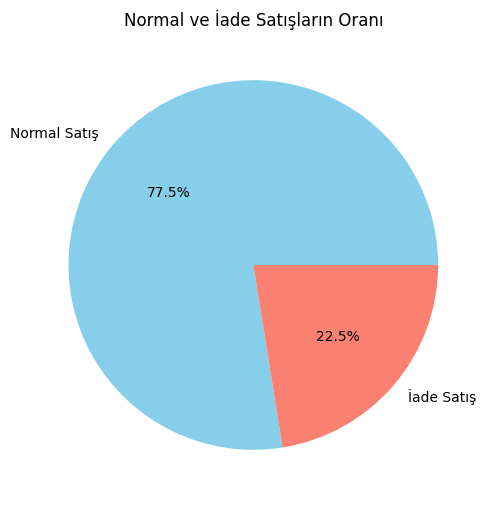

In [44]:
# Toplam normal ve iade satışları
sales_summary = {
    'Normal Satış': normal_sales,
    'İade Satış': returned_sales
}

# Pasta grafiği çiz
plt.figure(figsize=(6,6))
plt.pie(sales_summary.values(), labels=sales_summary.keys(), autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Normal ve İade Satışların Oranı')
plt.show()

Grafiğe göre:

* Normal satışlar toplamın %77,5’ini oluşturuyor.

* İade satışlar ise %22,5 seviyesinde.

Bu tablo şunu gösteriyor:

* Satışların büyük çoğunluğu sorunsuz gerçekleşmiş.

* Ancak her 4 satıştan yaklaşık 1’i iade edilmiş. Bu oran dikkat çekici derecede yüksek.

##### Satışları zamana göre gruplama

In [45]:
# Günlük toplam satış (Amount) ve adet (Quantity):
daily_sales = df.groupby('Date').agg({'Quantity':'sum', 'Amount':'sum'}).reset_index()

In [46]:
# Aylık toplam satış (Amount) ve adet (Quantity):
monthly_sales = df.groupby(df['Date'].dt.to_period('M')).agg({'Quantity':'sum', 'Amount':'sum'}).reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

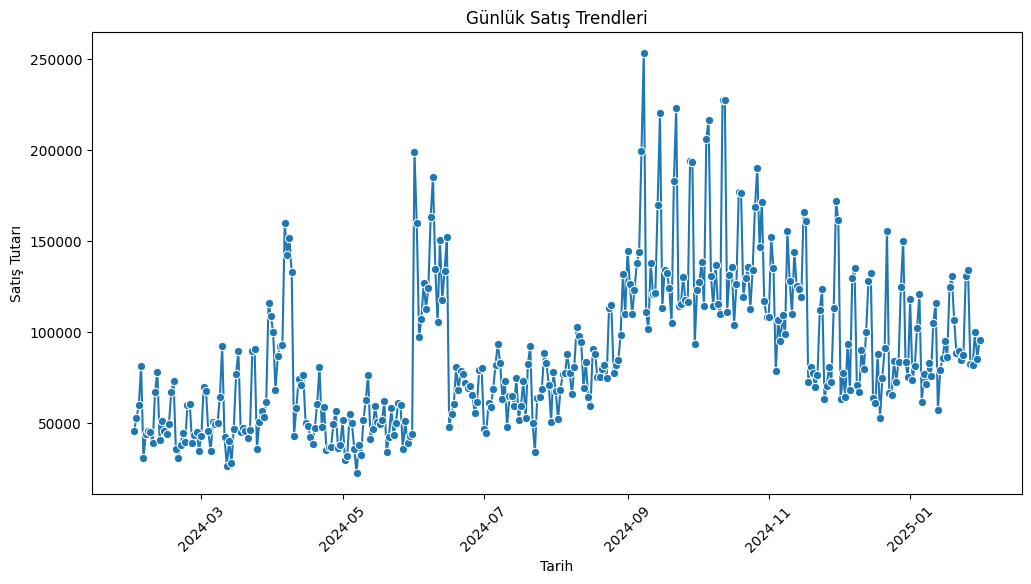

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales, x='Date', y='Amount', marker='o')
plt.title("Günlük Satış Trendleri")
plt.xlabel("Tarih")
plt.ylabel("Satış Tutarı")
plt.xticks(rotation=45)
plt.show()

* 2024 yılının ilk aylarında satışlar görece düşük ve dalgalı seyretmiş. Yılın ortasına doğru birkaç kez keskin artış olmuş, özellikle Mayıs ve Eylül–Kasım döneminde zirve noktaları görülüyor.
* Günlük satışlarda ciddi iniş çıkışlar var. Bu da satışların sürekli değil, kampanyalar veya özel günlerle tetiklendiğini düşündürüyor.
* Satışlar yıl içinde istikrarlı şekilde artış göstermiş, özellikle sonbaharda zirveye ulaşmış. Ancak dalgalanmaların yüksek olması, kampanyaların satış hacmi üzerinde çok güçlü bir etkiye sahip olduğunu gösteriyor.

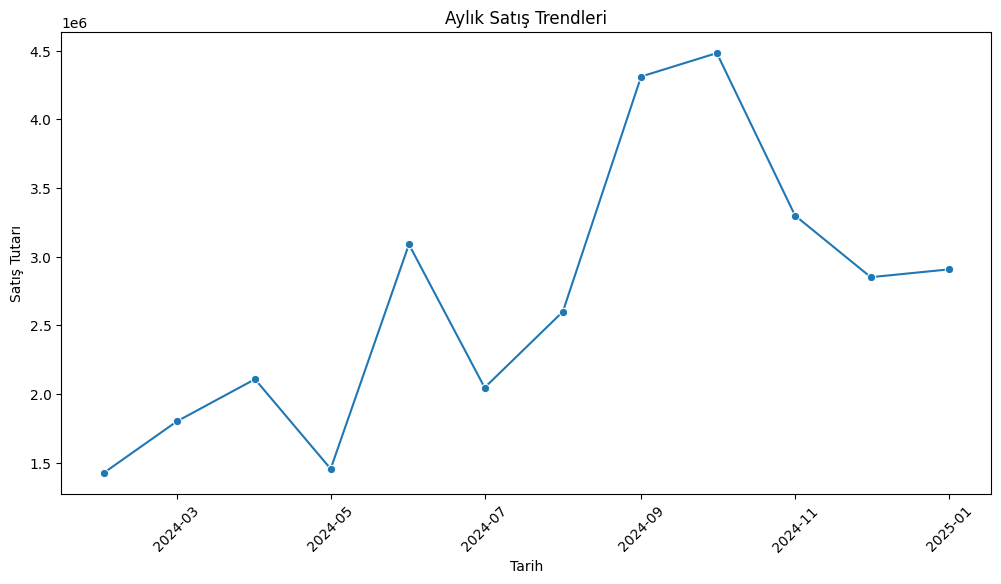

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Date', y='Amount', marker='o')
plt.title("Aylık Satış Trendleri")
plt.xlabel("Tarih")
plt.ylabel("Satış Tutarı")
plt.xticks(rotation=45)
plt.show()


* Satışların yıl boyunca artış trendinde olduğu, ancak kampanya ve sezonlara çok bağlı olduğu görülüyor.

* En yüksek satış Ekim 2024’te gerçekleşmiş.

* Mayıs ve Temmuz gibi dönemsel düşüşler dikkat çekici, bu dönemlerde satış artırıcı stratejilere ihtiyaç olabilir.

* Kasım–Ocak arası düşüş, yıl sonu kampanyalarının ardından yaşanan normalleşme olarak yorumlanabilir.

## Products Exploratory Data Analysis 📦

### 1️⃣ Veriyi yükle ve temel bilgileri incele

In [51]:
df = pd.read_excel("C:/Users/ceren/Desktop/products_clean.xlsx")  

In [52]:
df.head()

,ProductCode,Class,MainCategory,Category,SubCategory,SubCategoryClass,MainCategoryEN,CategoryEN,SubCategoryEN,SubCategoryClassEN
0,M1020589168,Ticari Malzemeler,Denim All,Denim All,Denim Pantolon,Boyfriend,Denim All,Denim All,Denim Pants,Boyfriend
1,M1011043-90090,Ticari Malzemeler,Denim All,Denim All,Denim Pantolon,Wide Leg,Denim All,Denim All,Denim Pants,Wide Leg
2,M1010530-89661,Ticari Malzemeler,Denim All,Denim All,Denim Pantolon,Straight,Denim All,Denim All,Denim Pants,Straight
3,M101114-86012,Ticari Malzemeler,Denim All,Denim All,Denim Pantolon,Boyfriend,Denim All,Denim All,Denim Pants,Boyfriend
4,M1010349-86424,Ticari Malzemeler,Denim All,Denim All,Denim Pantolon,Flare,Denim All,Denim All,Denim Pants,Wide Leg


In [53]:
# Veri tipi 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductCode         1511 non-null   object
 1   Class               1511 non-null   object
 2   MainCategory        1511 non-null   object
 3   Category            1511 non-null   object
 4   SubCategory         1511 non-null   object
 5   SubCategoryClass    1511 non-null   object
 6   MainCategoryEN      1511 non-null   object
 7   CategoryEN          1511 non-null   object
 8   SubCategoryEN       1511 non-null   object
 9   SubCategoryClassEN  1511 non-null   object
dtypes: object(10)
memory usage: 118.2+ KB


In [54]:
# Eksik değer sayısı
df.isnull().sum()

ProductCode           0
Class                 0
MainCategory          0
Category              0
SubCategory           0
SubCategoryClass      0
MainCategoryEN        0
CategoryEN            0
SubCategoryEN         0
SubCategoryClassEN    0
dtype: int64

### 2️⃣ Temel istatistiksel özet (kategorik için frekans)
Bu şekilde, her kategorik kolonun kaç farklı değeri olduğunu ve hangi değerlerin daha sık olduğunu görebiliriz.

In [55]:
for col in ['ProductCode','Class','MainCategory','Category','SubCategory','SubCategoryClass',
            'MainCategoryEN','CategoryEN','SubCategoryEN','SubCategoryClassEN']:
    print(f"\n{col} kolonunun değer dağılımı:")
    print(df[col].value_counts())



ProductCode kolonunun değer dağılımı:
M1020589168       1
M1010339-87601    1
M1081188720       1
M100488-85630     1
M1017089984       1
                 ..
M1074688339       1
M1073486871       1
M1012651-90806    1
M1073483491       1
M101225-35482     1
Name: ProductCode, Length: 1511, dtype: int64

Class kolonunun değer dağılımı:
Ticari Malzemeler    1511
Name: Class, dtype: int64

MainCategory kolonunun değer dağılımı:
Denim All    1511
Name: MainCategory, dtype: int64

Category kolonunun değer dağılımı:
Denim All    1511
Name: Category, dtype: int64

SubCategory kolonunun değer dağılımı:
Denim Pantolon    1511
Name: SubCategory, dtype: int64

SubCategoryClass kolonunun değer dağılımı:
Wide Leg               304
Flare                  277
Straight               215
Skinny                 197
Mom                    135
Slim Straight          115
Super Skinny            91
Boyfriend               82
Baggy                   79
Colored Denims           4
Büyük Beden              3
D

### 3️⃣Görselleştirme

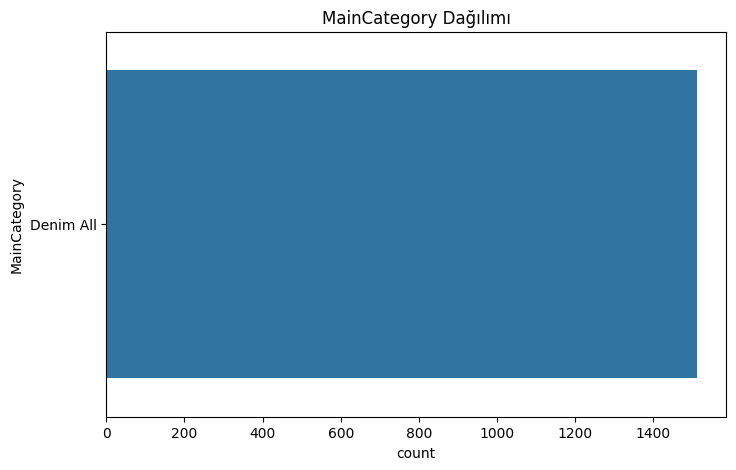

In [56]:
# Ana kategori dağılımı
plt.figure(figsize=(8,5))
sns.countplot(y='MainCategory', data=df, order=df['MainCategory'].value_counts().index)
plt.title("MainCategory Dağılımı")
plt.show()


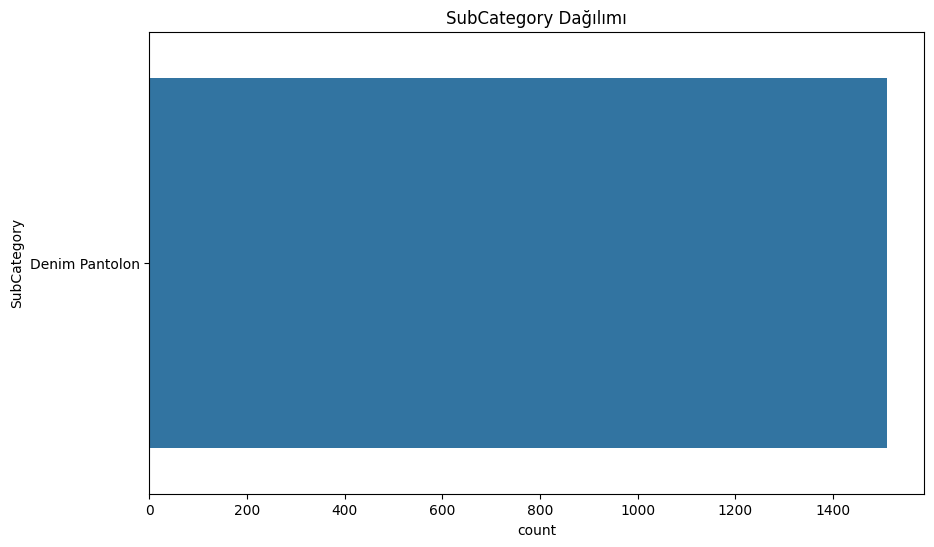

In [57]:
# Alt kategoriler ve sınıf dağılımları
plt.figure(figsize=(10,6))
sns.countplot(y='SubCategory', data=df, order=df['SubCategory'].value_counts().index)
plt.title("SubCategory Dağılımı")
plt.show()


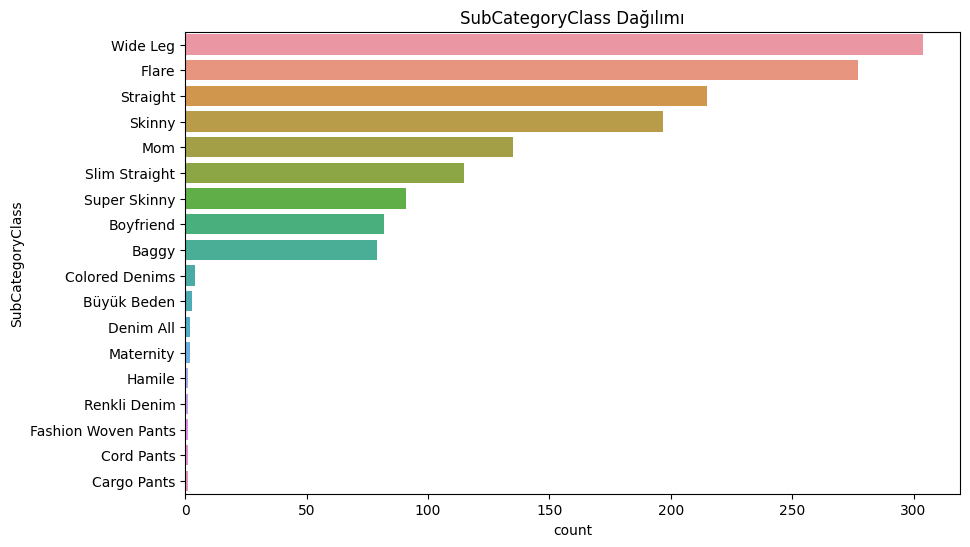

In [61]:
# Alt kategori sınıflarının dağılımı :
plt.figure(figsize=(10,6))
sns.countplot(y='SubCategoryClass', data=df, order=df['SubCategoryClass'].value_counts().index)
plt.title("SubCategoryClass Dağılımı")
plt.show()

* Müşteri kitlesi daha çok klasik ve popüler jean kesimlerine (Wide Leg, Flare, Straight, Skinny) yönelmiş.

* Alternatif veya özel gruplar (hamile, renkli, büyük beden, kargo vb.) çok sınırlı.

* Bu tablo, hem müşteri talebi hem de stok planlaması açısından "hangi ürünlere ağırlık verilmesi gerektiğini" gösteriyor.